# WeatherPy
----


In [4]:
# import api key and all important modules
from api_keys import weather_api_key 

from citipy import citipy
import random
import requests
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

# set plot style
plt.style.use('seaborn-colorblind')

## Generate Cities List

In [5]:
# function to create api query url
def make_url(name, country):
    base_url = "http://api.openweathermap.org/data/2.5/weather?q="
    url = f"{base_url}{name},{country}&appid={weather_api_key}"
    return url

In [6]:
# function to take a city and query the api for info
def query(city):
    url = make_url(city[0], city[1])
    response = requests.get(url)

    # if error 
    if response.status_code > 399:
        print("City not found. Skipping...")
        return 0

    return response.json()

In [7]:
# get weather data on 500 cities
cities = []
data = []
i = 1

while len(data) < 500:
    # put in random lat-long and get city
    city_obj = citipy.nearest_city(random.uniform(-90,90), random.uniform(-180,180))
    city = (city_obj.city_name, city_obj.country_code)
    
    # check if city is already in the list or not
    if city not in cities:
        cities.append(city)
        print(f"Processing City {i} | {city[0]}")
        
        # get city weather data
        result = query(city)
        if result != 0:
            # append IF no error
            data.append(result)
    i += 1

Processing City 1 | taolanaro
City not found. Skipping...
Processing City 2 | rikitea
Processing City 3 | vaini
Processing City 4 | mataura
City not found. Skipping...
Processing City 5 | blyznyuky
Processing City 6 | dunedin
Processing City 7 | attawapiskat
City not found. Skipping...
Processing City 8 | abu dhabi
Processing City 9 | barrow
Processing City 10 | yellowknife
Processing City 11 | atuona
Processing City 12 | albany
Processing City 14 | busselton
Processing City 15 | saint-augustin
Processing City 16 | cape town
Processing City 17 | itum-kale
Processing City 18 | prince rupert
Processing City 19 | tezu
Processing City 20 | nanakuli
Processing City 21 | key west
Processing City 22 | cidreira
Processing City 23 | alpena
Processing City 24 | sibolga
Processing City 25 | bluff
Processing City 26 | butaritari
Processing City 28 | hilo
Processing City 29 | petropavlovsk-kamchatskiy
Processing City 31 | tongchuan
Processing City 32 | ribeira grande
Processing City 33 | belushya g

Processing City 409 | qena
Processing City 410 | port-gentil
Processing City 413 | ruatoria
City not found. Skipping...
Processing City 415 | north myrtle beach
Processing City 416 | macau
Processing City 417 | seoul
Processing City 419 | tumut
Processing City 420 | melekhovo
Processing City 424 | mana
Processing City 426 | viedma
Processing City 427 | eureka
Processing City 428 | mitu
Processing City 433 | mumford
Processing City 437 | menongue
Processing City 438 | upernavik
Processing City 439 | vodnyy
Processing City 441 | harlingen
Processing City 445 | bertoua
Processing City 446 | nantucket
Processing City 447 | esperance
Processing City 448 | port lincoln
Processing City 449 | new haven
Processing City 450 | havre-saint-pierre
Processing City 452 | kozan
Processing City 455 | clyde river
Processing City 457 | ixtapa
Processing City 459 | lata
City not found. Skipping...
Processing City 460 | baykit
Processing City 462 | chunoyar
Processing City 465 | manono
Processing City 466 

Processing City 1022 | port hawkesbury
Processing City 1026 | krasnooktyabrskiy
Processing City 1028 | formosa do rio preto
Processing City 1030 | sault sainte marie
Processing City 1036 | yerbogachen
Processing City 1038 | muisne
Processing City 1044 | maua
Processing City 1050 | haines junction
Processing City 1053 | fort nelson
Processing City 1055 | belaya gora
Processing City 1057 | waterloo
Processing City 1058 | thongwa
Processing City 1073 | kavieng
Processing City 1076 | chitapur
Processing City 1078 | carballo
Processing City 1081 | pangody
Processing City 1082 | shaunavon
Processing City 1083 | cascais
Processing City 1085 | irmo
Processing City 1090 | fort smith
Processing City 1093 | burns lake
Processing City 1094 | san lazaro
City not found. Skipping...
Processing City 1095 | karamea
City not found. Skipping...
Processing City 1102 | kaitangata
Processing City 1108 | qaqortoq
Processing City 1110 | kihei
Processing City 1112 | kegayli
City not found. Skipping...
Processi

In [8]:
# make list of dicts in order to convert to dataframe

datalist = []
for d in data:
    # convert temperature to fahrenheit (from Kelvin)
    temp = d['main']['temp_max']
    fahr_temp = (temp - 273.15) * 1.8 + 32
    
    # dict keys are formatted such that they can be used directly as axis labels
    currdict = {"City": d['name'],
                "Latitude": d['coord']['lat'],
                "Longitude": d['coord']['lon'],
                "Max Temperature": fahr_temp,
                "Humidity": d['main']['humidity'],
                "Windspeed": d['wind']['speed'],
                "Cloudiness": d['clouds']['all'],
                "Date": d['dt'],
                "Country": d['sys']['country']}
    datalist.append(currdict)

units = {"Max Temperature": "F", "Humidity": "%", "Windspeed": "mph", "Cloudiness": "%"}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# convert to dataframe and export to csv
df = pd.DataFrame(datalist)
df.to_csv("weather_data.csv", index = False)

df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Windspeed,Cloudiness,Date,Country
0,Rikitea,-23.12,-134.97,74.588,80,8.78,100,1602982257,PF
1,Vaini,-21.20,-175.20,78.800,83,8.20,75,1602982258,TO
2,Blyznyuky,48.86,36.56,60.728,89,7.10,100,1602982258,UA
3,Dunedin,-45.87,170.50,53.006,70,0.89,53,1602982259,NZ
4,Abu Dhabi,24.47,54.37,77.000,57,1.50,0,1602982162,AE


In [10]:
# look at summary stats
df.describe()

# notably, humidity max is 100 so we don't need to remove humidities above 100

,Latitude,Longitude,Max Temperature,Humidity,Windspeed,Cloudiness,Date
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,5.000000e+02
mean,18.795740,14.523400,59.794592,74.74400,3.511300,50.054000,1.602982e+09
std,34.623506,90.385925,19.424128,19.28934,2.341279,40.060014,7.566857e+01
min,-54.800000,-175.200000,4.406000,9.00000,0.100000,0.000000,1.602981e+09
25%,-8.855000,-63.967500,46.004000,64.00000,1.500000,4.000000,1.602982e+09
50%,20.470000,20.135000,62.996000,80.00000,3.100000,47.000000,1.602982e+09
75%,50.010000,90.250000,76.676000,88.25000,5.057500,90.250000,1.602982e+09
max,78.220000,179.320000,93.200000,100.00000,11.440000,100.000000,1.602982e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# define function to plot and label any variable vs latitude
def plots(var):
    fig, ax = plt.subplots()
    ax.scatter(df['Latitude'], df[var])
    ax.set(xlabel = "Latitude",
          ylabel = f"{var} ({units[var]})",
          title = f"City Latitude vs {var} | 10/17/2020")
    
    plt.savefig(f"Lat vs {var}.png")

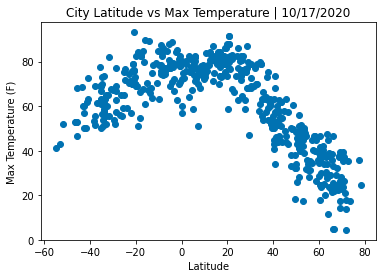

In [12]:
plots("Max Temperature")

This shows the maximum temperature in each city, plotted across latitude. As would be expected, the highest temperatures are near 0 latitude (i.e. the equator), and decreases on each side.

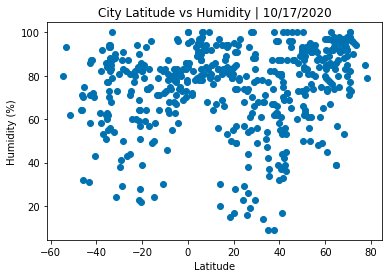

In [13]:
plots("Humidity")

This shows humidity (as a percentage) by latitude, and there doesn't appear to be much correlation between the two.

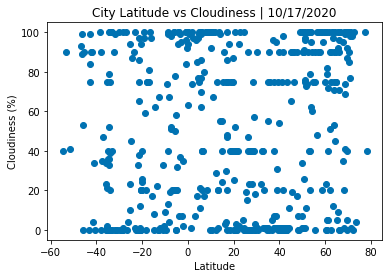

In [14]:
plots("Cloudiness")

Here we see cloudiness (also as a percentage) as a function of latitude, and again doesn't appear to have a high correlation - cloudiness seems scattered randomly irrespective of latitude.

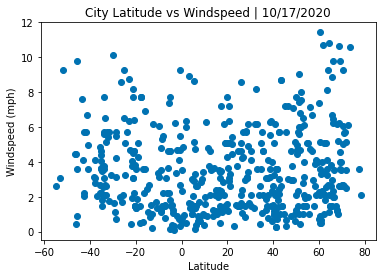

In [15]:
plots("Windspeed")

This is windspeed plotted by latitude. It appears that most wind speeds are around 0-5 mph, and scattered fairly randomly no matter the latitude.

## Linear Regression

In [16]:
# filter dataset into northern and southern hemisphere
Northern = df[df['Latitude'] > 0]
Southern = df[df['Latitude'] < 0]

dict_key = {"Northern": Northern, "Southern": Southern, "All": df}

# define function to calculate and plot linear regression over scatterplot, vs latitude
# inputs are STRINGS

def regress(hemi, var):
    hemi_data = dict_key[hemi] #look up dataset
    x = hemi_data['Latitude']
    y = hemi_data[var]
    
    # calculate repression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress = x * slope + intercept
    
    # plot
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.plot(x, regress, color = "green")
    
    # format
    ax.set(xlabel = "Latitude",
          ylabel = f"{var} ({units[var]})",
          title = f"Latitude vs {var}: {hemi} Hemisphere")
    
    # print rvalue and equation
    print(f"The r-value is: {rvalue}")
    print(f"y = {round(slope,2)}x + {round(intercept,2)}")
    # @TODO: plot equation over graph
    
    plt.savefig(f"Lat vs {var} linear regression.png")
    

The r-value is: -0.8821251453043751
y = -0.87x + 89.07


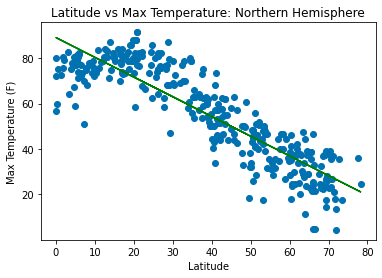

In [17]:
regress("Northern", 'Max Temperature')

The r-value is: 0.7032500874131127
y = 0.56x + 81.47


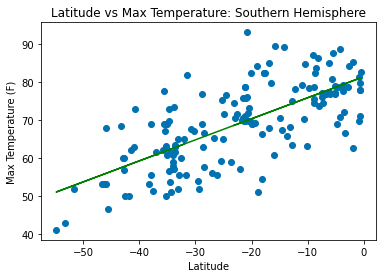

In [18]:
regress("Southern", 'Max Temperature')

Both of these plots have significant r-values, and appear to show that moving away from the equator generally decreases maximum temperature. (Interestingly, the northern hemisphere's slope is much higher, though the southern hemisphere does have fewer points and a smaller range of latitudes.)

The r-value is: 0.11262034613468487
y = 0.11x + 72.31


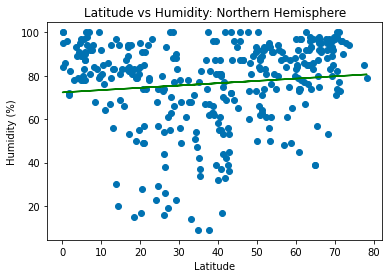

In [19]:
regress("Northern", 'Humidity')

The r-value is: 0.07994874099449334
y = 0.1x + 73.52


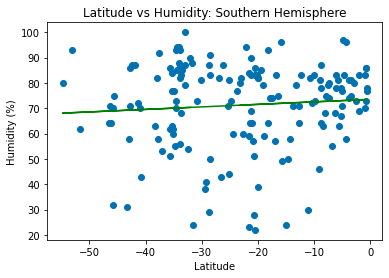

In [20]:
regress("Southern", 'Humidity')

These two plots taken together seem to say that humidity does not correlate with temperature, certainly not in a linear fashion. Looking at them just by eye, I would observe that the area just around the equator has no humidities below about 60%, and the same is somewhat true at high latitudes as well (mostly northern; southern extreme latitudes have very few cities).

The r-value is: 0.22374688546039143
y = 0.02x + 2.5


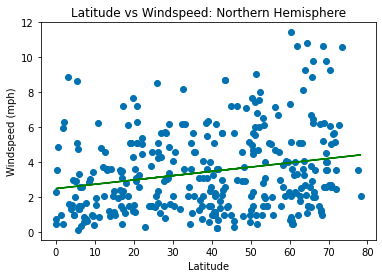

In [22]:
regress("Northern", 'Windspeed')

The r-value is: -0.182905936832204
y = -0.03x + 2.92


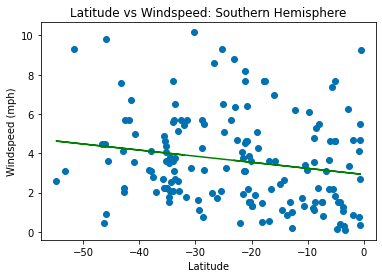

In [23]:
regress("Southern", 'Windspeed')

These plots show the relation that windspeed has to latitude in each hemisphere. Given the low r-values, it seems likely that there is little or no relation between the two. 

The r-value is: 0.11085685641717884
y = 0.21x + 43.62


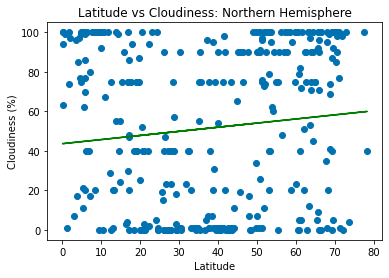

In [24]:
regress("Northern", 'Cloudiness')

The r-value is: 0.03394620105145464
y = 0.1x + 48.86


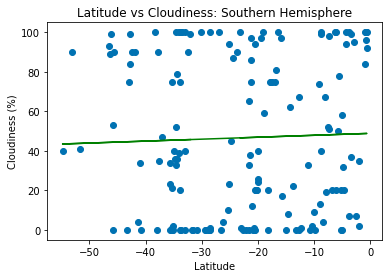

In [25]:
regress("Southern", 'Cloudiness')

These plots show the relation that cloudiness has to latitude in each hemisphere. With r-values that low, it seems extremely likely that the two have no relation at all. 